# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [16]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 573


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{city}&appid={weather_api_key}"
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    #Run an API request for each of the cities
    try:
        #Parse the JSON and retrieve data
        weather_response = requests.get(city_url)
        weather_json = weather_response.json()

        city_weather = weather_json['weather'][0]['description']

            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_json['coord']['lat']
        city_lng = weather_json['coord']['lon']
        city_max_temp = weather_json['main']['temp_max']
        city_humidity = weather_json['main']['humidity']
        city_clouds = weather_json['clouds']['all']
        city_wind = weather_json['wind']['speed']
        city_country = weather_json['sys']['country']
        city_date = weather_json['dt']

            # Append the City information into city_data list
        city_data.append({"City": city, 
                              "Lat": city_lat, 
                              "Lng": city_lng, 
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date})

     # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bahia blanca
Processing Record 2 of Set 1 | kargasok
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | port alfred
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 7 of Set 1 | sudbury
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | vaini
Processing Record 13 of Set 1 | antsohihy
Processing Record 14 of Set 1 | matamoros
Processing Record 15 of Set 1 | mount isa
Processing Record 16 of Set 1 | hasaki
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | marsaxlokk
Processing Record 19 of Set 1 | nanortalik
Processing Record 20 of Set 1 | port elizabeth
Processing Record 21 of Set 1 | staryy nady

Processing Record 35 of Set 4 | stuttgart
Processing Record 36 of Set 4 | cururupu
Processing Record 37 of Set 4 | saldanha
Processing Record 38 of Set 4 | beringovskiy
Processing Record 39 of Set 4 | nassau
Processing Record 40 of Set 4 | cidreira
Processing Record 41 of Set 4 | tual
Processing Record 42 of Set 4 | hermon
Processing Record 43 of Set 4 | salalah
Processing Record 44 of Set 4 | skalistyy
City not found. Skipping...
Processing Record 45 of Set 4 | mattru
Processing Record 46 of Set 4 | yarmouth
Processing Record 47 of Set 4 | vestmanna
Processing Record 48 of Set 4 | azimur
City not found. Skipping...
Processing Record 49 of Set 4 | opuwo
Processing Record 0 of Set 5 | puerto escondido
Processing Record 1 of Set 5 | sambava
Processing Record 2 of Set 5 | adjumani
Processing Record 3 of Set 5 | castelo branco
Processing Record 4 of Set 5 | illoqqortoormiut
City not found. Skipping...
Processing Record 5 of Set 5 | kyren
Processing Record 6 of Set 5 | bacolod
Processing Re

Processing Record 25 of Set 8 | sainte-maxime
Processing Record 26 of Set 8 | kenitra
Processing Record 27 of Set 8 | falealupo
City not found. Skipping...
Processing Record 28 of Set 8 | komsomolskiy
Processing Record 29 of Set 8 | katsuura
Processing Record 30 of Set 8 | micheweni
Processing Record 31 of Set 8 | labuhan
Processing Record 32 of Set 8 | hobyo
Processing Record 33 of Set 8 | nabire
Processing Record 34 of Set 8 | rungata
City not found. Skipping...
Processing Record 35 of Set 8 | znamenskoye
Processing Record 36 of Set 8 | shahr-e babak
Processing Record 37 of Set 8 | victoria
Processing Record 38 of Set 8 | orange cove
Processing Record 39 of Set 8 | iqaluit
Processing Record 40 of Set 8 | brae
Processing Record 41 of Set 8 | llanes
Processing Record 42 of Set 8 | hay river
Processing Record 43 of Set 8 | arys
Processing Record 44 of Set 8 | zalantun
Processing Record 45 of Set 8 | kedrovyy
Processing Record 46 of Set 8 | rio gallegos
Processing Record 47 of Set 8 | kh

Processing Record 14 of Set 12 | venice
Processing Record 15 of Set 12 | hilton head island
Processing Record 16 of Set 12 | taraclia
Processing Record 17 of Set 12 | rayon
Processing Record 18 of Set 12 | yar-sale
Processing Record 19 of Set 12 | sorvag
City not found. Skipping...
Processing Record 20 of Set 12 | tuatapere
Processing Record 21 of Set 12 | sorbhog
Processing Record 22 of Set 12 | roros
Processing Record 23 of Set 12 | hagersville
Processing Record 24 of Set 12 | kushima
Processing Record 25 of Set 12 | miandrivazo
Processing Record 26 of Set 12 | ciudad bolivar
Processing Record 27 of Set 12 | raga
Processing Record 28 of Set 12 | alugan
Processing Record 29 of Set 12 | srandakan
Processing Record 30 of Set 12 | berdigestyakh
Processing Record 31 of Set 12 | sol-iletsk
Processing Record 32 of Set 12 | thunder bay
Processing Record 33 of Set 12 | galitsy
Processing Record 34 of Set 12 | zeya
Processing Record 35 of Set 12 | inuvik
Processing Record 36 of Set 12 | nago
P

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(data = city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bahia blanca,-38.7196,-62.2724,290.44,100,0,3.60,AR,1674818625
1,kargasok,59.0556,80.8572,266.87,91,99,5.44,RU,1674818625
2,cape town,-33.9258,18.4232,299.87,52,0,7.72,ZA,1674818625
3,port alfred,-33.5906,26.8910,299.36,78,10,1.79,ZA,1674818626
4,punta arenas,-53.1500,-70.9167,283.21,76,75,2.57,CL,1674818626


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [17]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Max Temp (c),Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,
0,bahia blanca,-38.7196,-62.2724,290.44,17.29,100,0,3.60,AR,1674818625
1,kargasok,59.0556,80.8572,266.87,-6.28,91,99,5.44,RU,1674818625
2,cape town,-33.9258,18.4232,299.87,26.72,52,0,7.72,ZA,1674818625
3,port alfred,-33.5906,26.8910,299.36,26.21,78,10,1.79,ZA,1674818626
4,punta arenas,-53.1500,-70.9167,283.21,10.06,76,75,2.57,CL,1674818626


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

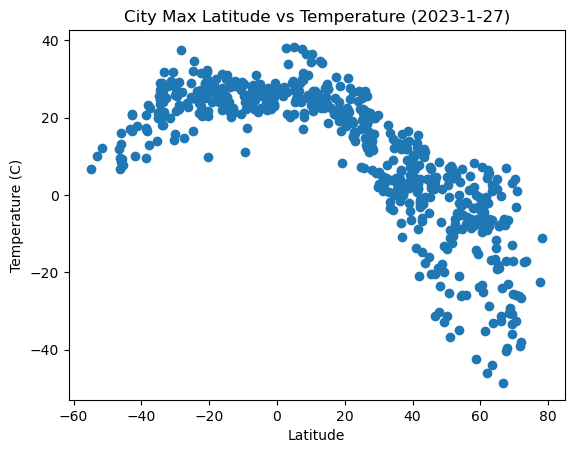

In [18]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df.loc[:,'Lat']
temp = city_data_df.loc[:,'Max Temp (c)']

plt.scatter(lat,temp)
# Incorporate the other graph properties
plt.title('City Max Latitude vs Temperature (2023-1-27)')
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
# Save the figure
plt.savefig("output_data/Fig1.png")

# # Show plot
plt.show()

#### Latitude Vs. Humidity

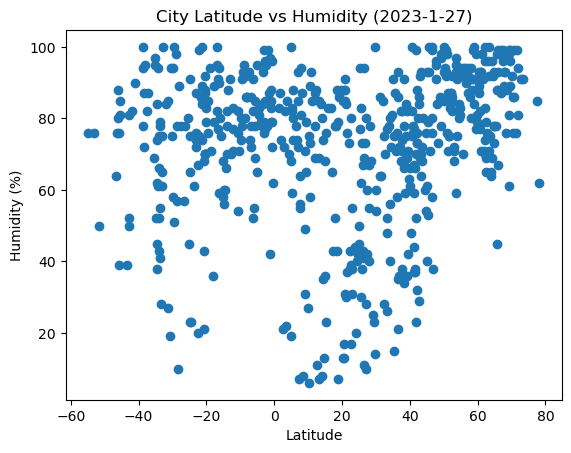

In [19]:
# Build the scatter plots for latitude vs. humidity
humidity = city_data_df.loc[:,'Humidity']
plt.scatter(lat, humidity)

# Incorporate the other graph properties
plt.title('City Latitude vs Humidity (2023-1-27)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

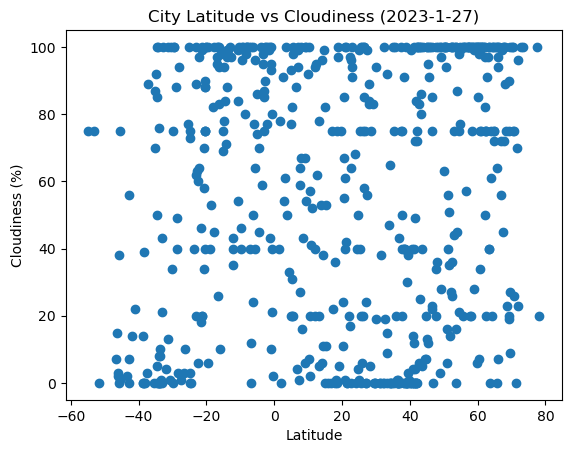

In [20]:
# Build the scatter plots for latitude vs. cloudiness
humidity = city_data_df.loc[:,'Cloudiness']
plt.scatter(lat,humidity)

# Incorporate the other graph properties
plt.title('City Latitude vs Cloudiness (2023-1-27)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# # Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

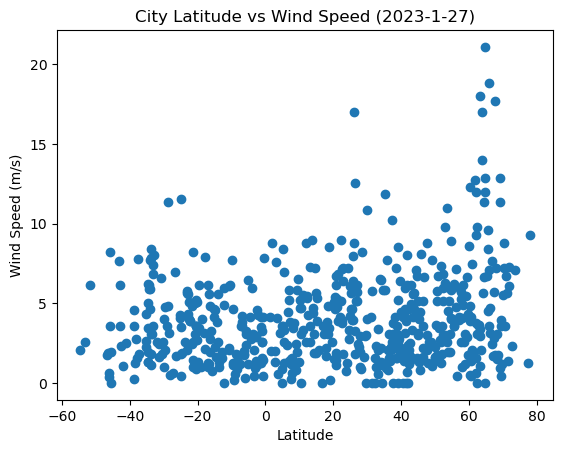

In [21]:
# Build the scatter plots for latitude vs. wind speed
wind_speed = city_data_df.loc[:,'Wind Speed']
plt.scatter(lat, wind_speed)

# Incorporate the other graph properties
plt.title('City Latitude vs Wind Speed (2023-1-27)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# # Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [22]:
# Define a function to create Linear Regression plots
def lin_plot(x,y,title,xlabel,ylabel):
    res = st.linregress(x,y)
    print(f'The r-value is: {res.rvalue}')
    line_eq = "y = " + str(round(res.slope,2)) + "x + " + str(round(res.intercept,2))
    plt.plot(x, y, 'o', label='original data')
    plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.annotate(f'{line_eq}', (x.mean(),y.min()),fontsize=10,color="red")
    plt.show()


In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] > 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Max Temp (c),Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,
1,kargasok,59.0556,80.8572,266.87,-6.28,91,99,5.44,RU,1674818625
5,sudbury,46.4900,-80.9900,252.69,-20.46,100,23,1.42,CA,1674818628
6,jamestown,42.0970,-79.2353,269.92,-3.23,73,100,4.63,US,1674818628
9,bethel,41.3712,-73.4140,273.98,0.83,77,0,0.00,US,1674818629
12,matamoros,25.5333,-103.2500,280.21,7.06,62,20,4.63,MX,1674818630


In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Max Temp (c),Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,
0,bahia blanca,-38.7196,-62.2724,290.44,17.29,100,0,3.60,AR,1674818625
2,cape town,-33.9258,18.4232,299.87,26.72,52,0,7.72,ZA,1674818625
3,port alfred,-33.5906,26.8910,299.36,26.21,78,10,1.79,ZA,1674818626
4,punta arenas,-53.1500,-70.9167,283.21,10.06,76,75,2.57,CL,1674818626
7,hobart,-42.8794,147.3294,294.07,20.92,52,0,6.17,AU,1674818457


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8291210038066835


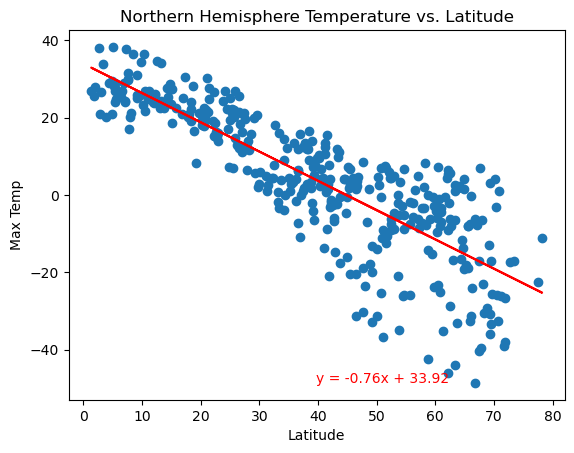

In [27]:
# Linear regression on Northern Hemisphere
north_temp_c = northern_hemi_df.loc[:,'Max Temp (c)']
north_lat = northern_hemi_df.loc[:, 'Lat']

lin_plot(north_lat, north_temp_c, 'Northern Hemisphere Temperature vs. Latitude', 'Latitude', 'Max Temp')


The r-value is: 0.4952446618446192


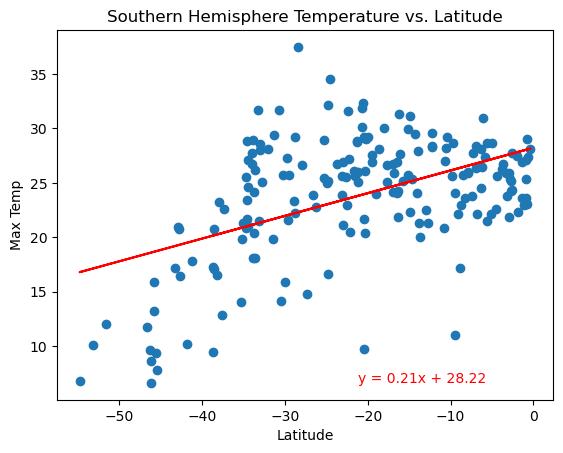

In [28]:
# Linear regression on Southern Hemisphere
south_temp = southern_hemi_df.loc[:, 'Max Temp (c)']
south_lat = southern_hemi_df.loc[:, 'Lat']

lin_plot(south_lat, south_temp, 'Southern Hemisphere Temperature vs. Latitude', 'Latitude', 'Max Temp')

**Discussion about the linear relationship:** Max Temp and Latitude seem to have an inverse relationship when latitude > 0, and a positive relationshop when latitude < 0 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4367075087731715


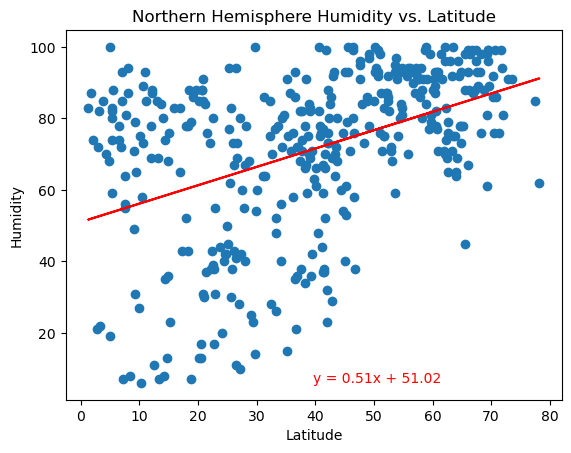

In [29]:
# Northern Hemisphere
north_hum = northern_hemi_df.loc[:, 'Humidity']
north_lat = northern_hemi_df.loc[:, 'Lat']

lin_plot(north_lat, north_hum, 'Northern Hemisphere Humidity vs. Latitude', 'Latitude', 'Humidity')

The r-value is: 0.22129240456573643


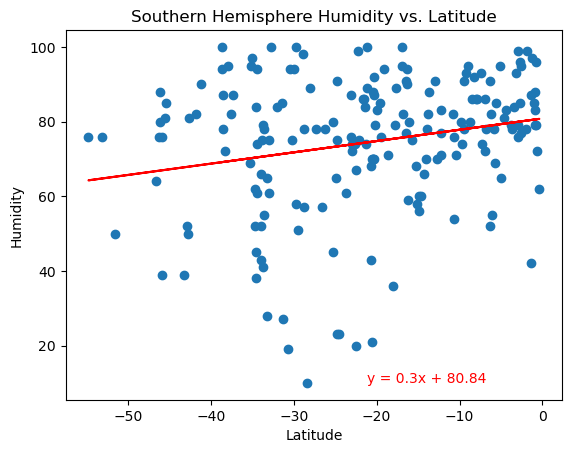

In [30]:
# Southern Hemisphere
south_hum = southern_hemi_df.loc[:, 'Humidity']
south_lat = southern_hemi_df.loc[:, 'Lat']

lin_plot(south_lat, south_hum, 'Southern Hemisphere Humidity vs. Latitude', 'Latitude', 'Humidity')

    **Discussion about the linear relationship:** The r value for the relationship between humidity and latitude seem low

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.21306038221649384


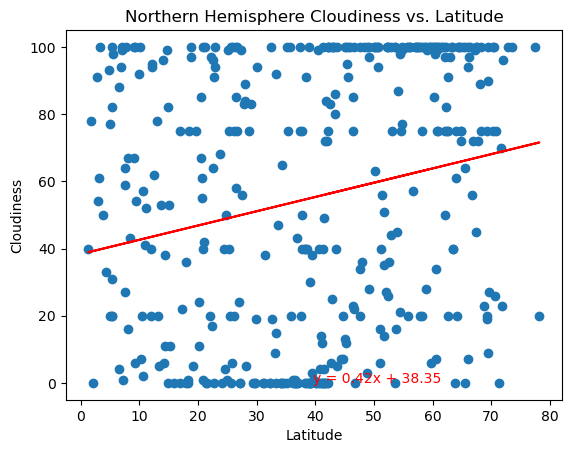

In [31]:
# Northern Hemisphere
north_cloud = northern_hemi_df.loc[:, 'Cloudiness']
north_lat = northern_hemi_df.loc[:, 'Lat']

lin_plot(north_lat, north_cloud, 'Northern Hemisphere Cloudiness vs. Latitude', 'Latitude', 'Cloudiness')

The r-value is: 0.47147456377394664


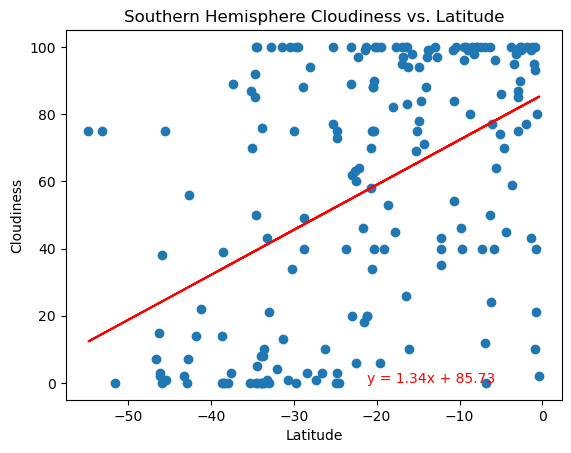

In [32]:
# Southern Hemisphere
south_cloud = southern_hemi_df.loc[:, 'Cloudiness']
south_lat = southern_hemi_df.loc[:, 'Lat']

lin_plot(south_lat, south_cloud, 'Southern Hemisphere Cloudiness vs. Latitude', 'Latitude', 'Cloudiness')

**Discussion about the linear relationship:** The r value for the relationship between cloudiness and latitude seem low

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.17875421544804496


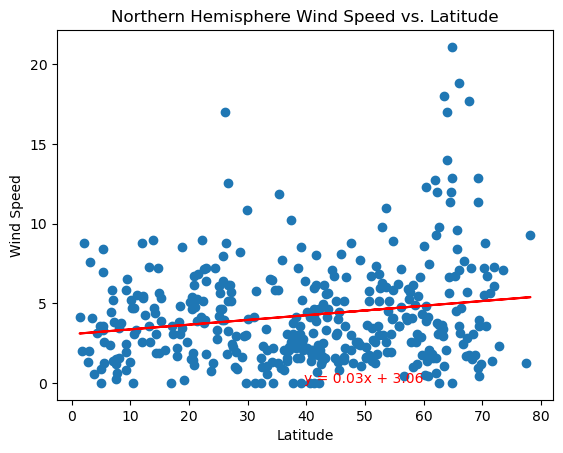

In [33]:
# Northern Hemisphere
north_wind = northern_hemi_df.loc[:, 'Wind Speed']
north_lat = northern_hemi_df.loc[:, 'Lat']

lin_plot(north_lat, north_wind, 'Northern Hemisphere Wind Speed vs. Latitude', 'Latitude', 'Wind Speed')

The r-value is: -0.1418161801004059


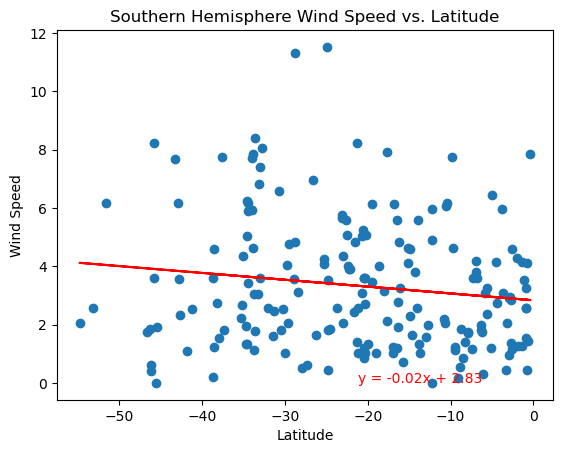

In [34]:
# Southern Hemisphere
south_wind = southern_hemi_df.loc[:, 'Wind Speed']
south_lat = southern_hemi_df.loc[:, 'Lat']

lin_plot(south_lat, south_wind, 'Southern Hemisphere Wind Speed vs. Latitude', 'Latitude', 'Wind Speed')


**Discussion about the linear relationship:** The r value for the relationship between wind speed and latitude seem low